# Часть 1: K-Means
## Кластеризация исполнителей по жанрам

В этом задании вы попробуете кластеризовать исполнителей по жанрам на основе данных о прослушивании.

В матрице sample_matrix по строкам стоят пользователи, а по столбцам - исполнители.

Для каждой пары (пользователь,исполнитель) в таблице стоит число - доля (процент) прослушивания этого исполнителя выбранным пользователем.

## Импорт библиотек, загрузка данных

In [1]:
import pandas as pd

In [2]:
ratings = pd.read_excel("https://github.com/evgpat/edu_stepik_rec_sys/blob/main/datasets/sample_matrix.xlsx?raw=true", engine='openpyxl')

In [3]:
ratings.head()

,user,the beatles,radiohead,deathcab for cutie,coldplay,modest mouse,sufjan stevens,dylan. bob,red hot clili peppers,pink fluid,...,municipal waste,townes van zandt,curtis mayfield,jewel,lamb,michal w. smith,群星,agalloch,meshuggah,yellowcard
0,0,NaN,0.020417,NaN,NaN,NaN,NaN,NaN,0.030496,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,0.184962,0.024561,NaN,NaN,0.136341,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,0.028635,NaN,NaN,NaN,0.024559,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.043529,0.086281,0.034590,0.016712,0.015935,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Задание

Транспонируем матрицу ratings, чтобы по строкам стояли исполнители.

In [4]:
ratings = ratings.T

Выкиньте строку под названием `user`.

In [6]:
ratings.drop('user', axis=0, inplace=True)

In [14]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
the beatles,NaN,NaN,NaN,NaN,0.043529,NaN,NaN,NaN,0.093398,0.017621,...,NaN,NaN,0.121169,0.038168,0.007939,0.017884,NaN,0.076923,NaN,NaN
radiohead,0.020417,0.184962,NaN,NaN,0.086281,0.006322,NaN,NaN,NaN,0.019156,...,0.017735,NaN,NaN,NaN,0.011187,NaN,NaN,NaN,NaN,NaN
deathcab for cutie,NaN,0.024561,0.028635,NaN,0.034590,NaN,NaN,NaN,NaN,0.013349,...,0.121344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027893
coldplay,NaN,NaN,NaN,NaN,0.016712,NaN,NaN,NaN,NaN,NaN,...,0.217175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
modest mouse,NaN,NaN,NaN,NaN,0.015935,NaN,NaN,NaN,NaN,0.030437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
ratings.shape

(1000, 5000)

## Вопрос для Quiz

Сколько строк осталось в матрице ratings?

Заполните пропуски нулями.

In [17]:
ratings.fillna(0, inplace=True)

Нормализуйте данные при помощи `normalize`.

In [20]:
from sklearn.preprocessing import normalize


X = normalize(ratings)

In [22]:
X.shape

(1000, 5000)

Примените KMeans с 5ю кластерами на преобразованной матрице (сделайте fit, а затем вычислите кластеры при помощи predict).

In [37]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [38]:
labels = model.predict(X)

In [48]:
# model.labels_ == labels

In [44]:
labels.shape

(1000,)

Выведите на экран центры кластеров (центроиды)

In [45]:
from matplotlib import pylab as plt

In [42]:
centroids = model.cluster_centers_

In [97]:
centroids[:,1]

array([1.45802263e-03, 2.24011121e-03, 1.73472348e-18, 1.13419143e-03,
       8.67361738e-19])

In [87]:
X.shape, labels.shape, centroids.shape

((1000, 5000), (1000,), (5, 5000))

In [72]:
X[:,0:].shape

(5000,)

In [101]:
labels[labels==3].shape

(358,)

In [100]:
X[labels==3,:].shape

(358, 5000)

Для каждого кластера найдем топ-10 исполнителей, наиболее близких к центроидам соотвествующего кластера.

Схожесть исполнителей будем считать по косинусной мере (spatial.distance.cosine).

## Quiz

Вычислите расстояние между "the beatles" и "coldplay". Ответ округлите до сотых.


In [88]:
from scipy import spatial


In [118]:
spatial.distance.cosine(ratings.loc['the beatles'], ratings.loc['coldplay'])

0.8955669648278295

Ниже для вашего удобства написана функция, принимающая на вход:
* np.array points - все точки кластера
* pt - центроид кластера
* K = 10 - число
Функция возвращает K индексов объектов (строк в массиве points), ближайших к центроиду.

In [103]:
def pClosest(points, pt, K=10):
    ind = [i[0] for i in sorted(enumerate(points), key=lambda x: spatial.distance.cosine(x[1], pt))]
 
    return ind[:K]

Примените функцию pClosest (или придумайте свой подход) и выведите для каждого кластера названия топ-10 исполнителей, ближайших к центроиду.

In [112]:
for n in range(5):
  print(pClosest(X[labels==n,:], centroids[n,:]))

[22, 9, 17, 25, 65, 8, 33, 18, 14, 53]
[0, 8, 3, 13, 28, 5, 16, 18, 19, 1]
[4, 8, 19, 14, 43, 28, 13, 88, 45, 25]
[0, 4, 2, 19, 21, 9, 3, 23, 1, 31]
[7, 2, 0, 9, 10, 12, 27, 1, 80, 53]


In [111]:
for n in range(5):
  print(ratings.index[pClosest(X[labels==n,:], centroids[n,:])])

Index(['the decemberists', 'kanye west', 'daft punk', 'the pixies', 'r.e.m.',
       'pink fluid', '‌linkin park', 'the arcade fire', 'beck', 'cake'],
      dtype='object')
Index(['the beatles', 'pink fluid', 'coldplay', 'elliotte smith',
       'ironand wine', 'sufjan stevens', 'the killers', 'the arcade fire',
       'muse', 'radiohead'],
      dtype='object')
Index(['modest mouse', 'pink fluid', 'muse', 'beck', 'brand new',
       'ironand wine', 'elliotte smith', 'the beach boys', 'spoon',
       'the pixies'],
      dtype='object')
Index(['the beatles', 'modest mouse', 'deathcab for cutie', 'muse',
       'white stripes', 'kanye west', 'coldplay', 'the rolling stones',
       'radiohead', 'blink-182'],
      dtype='object')
Index(['red hot clili peppers', 'deathcab for cutie', 'the beatles',
       'kanye west', 'niИ', 'led zeppelin.', 'sigur rós', 'radiohead',
       'paramore', 'cake'],
      dtype='object')


## Quiz

Проинтерпретируйте результат. Что можно сказать о смысле кластеров?

# Часть 2: сравнение алгоритмов кластеризации

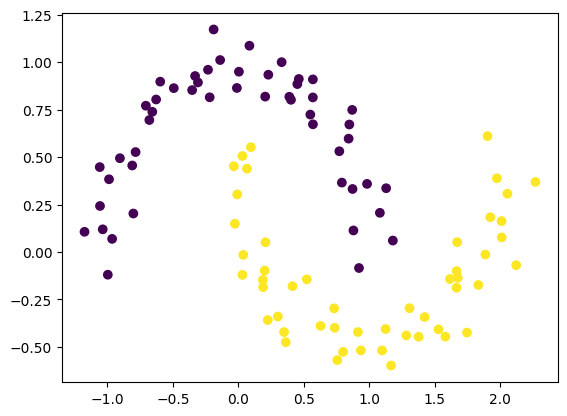

In [119]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons

data = make_moons(n_samples=100, noise=0.1, random_state=42)

X = data[0]
y = data[1]

plt.scatter(X[:,0], X[:,1], c=y)

Далее вы попробуете разные кластеризации для поиска кластеров. Также замеряйте время работы каждого метода.

Попробуйте найти кластеры при помощи KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


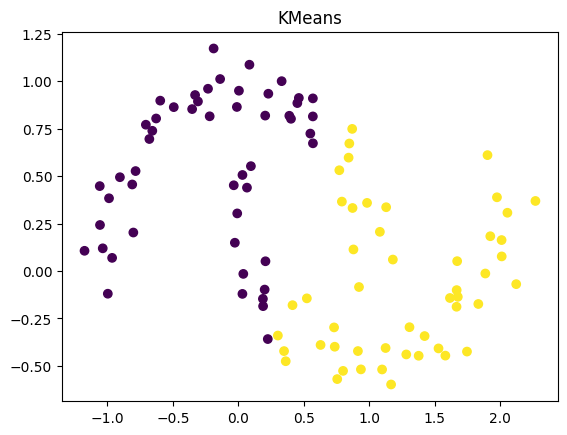

In [151]:
model = KMeans(n_clusters=2).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c = model)
plt.title('KMeans')
plt.show();

## Quiz

Подберите $\varepsilon$ и min_samples в DBSCAN, чтобы наилучшим образом найти кластеры.
Ищите гиперпараметры из диапазонов:
* eps in [0.05, 0.1, 0.2, 0.28, 0.3, 0.32]
* min_samples in [4, 5, 6, 7]

ValueError: ignored

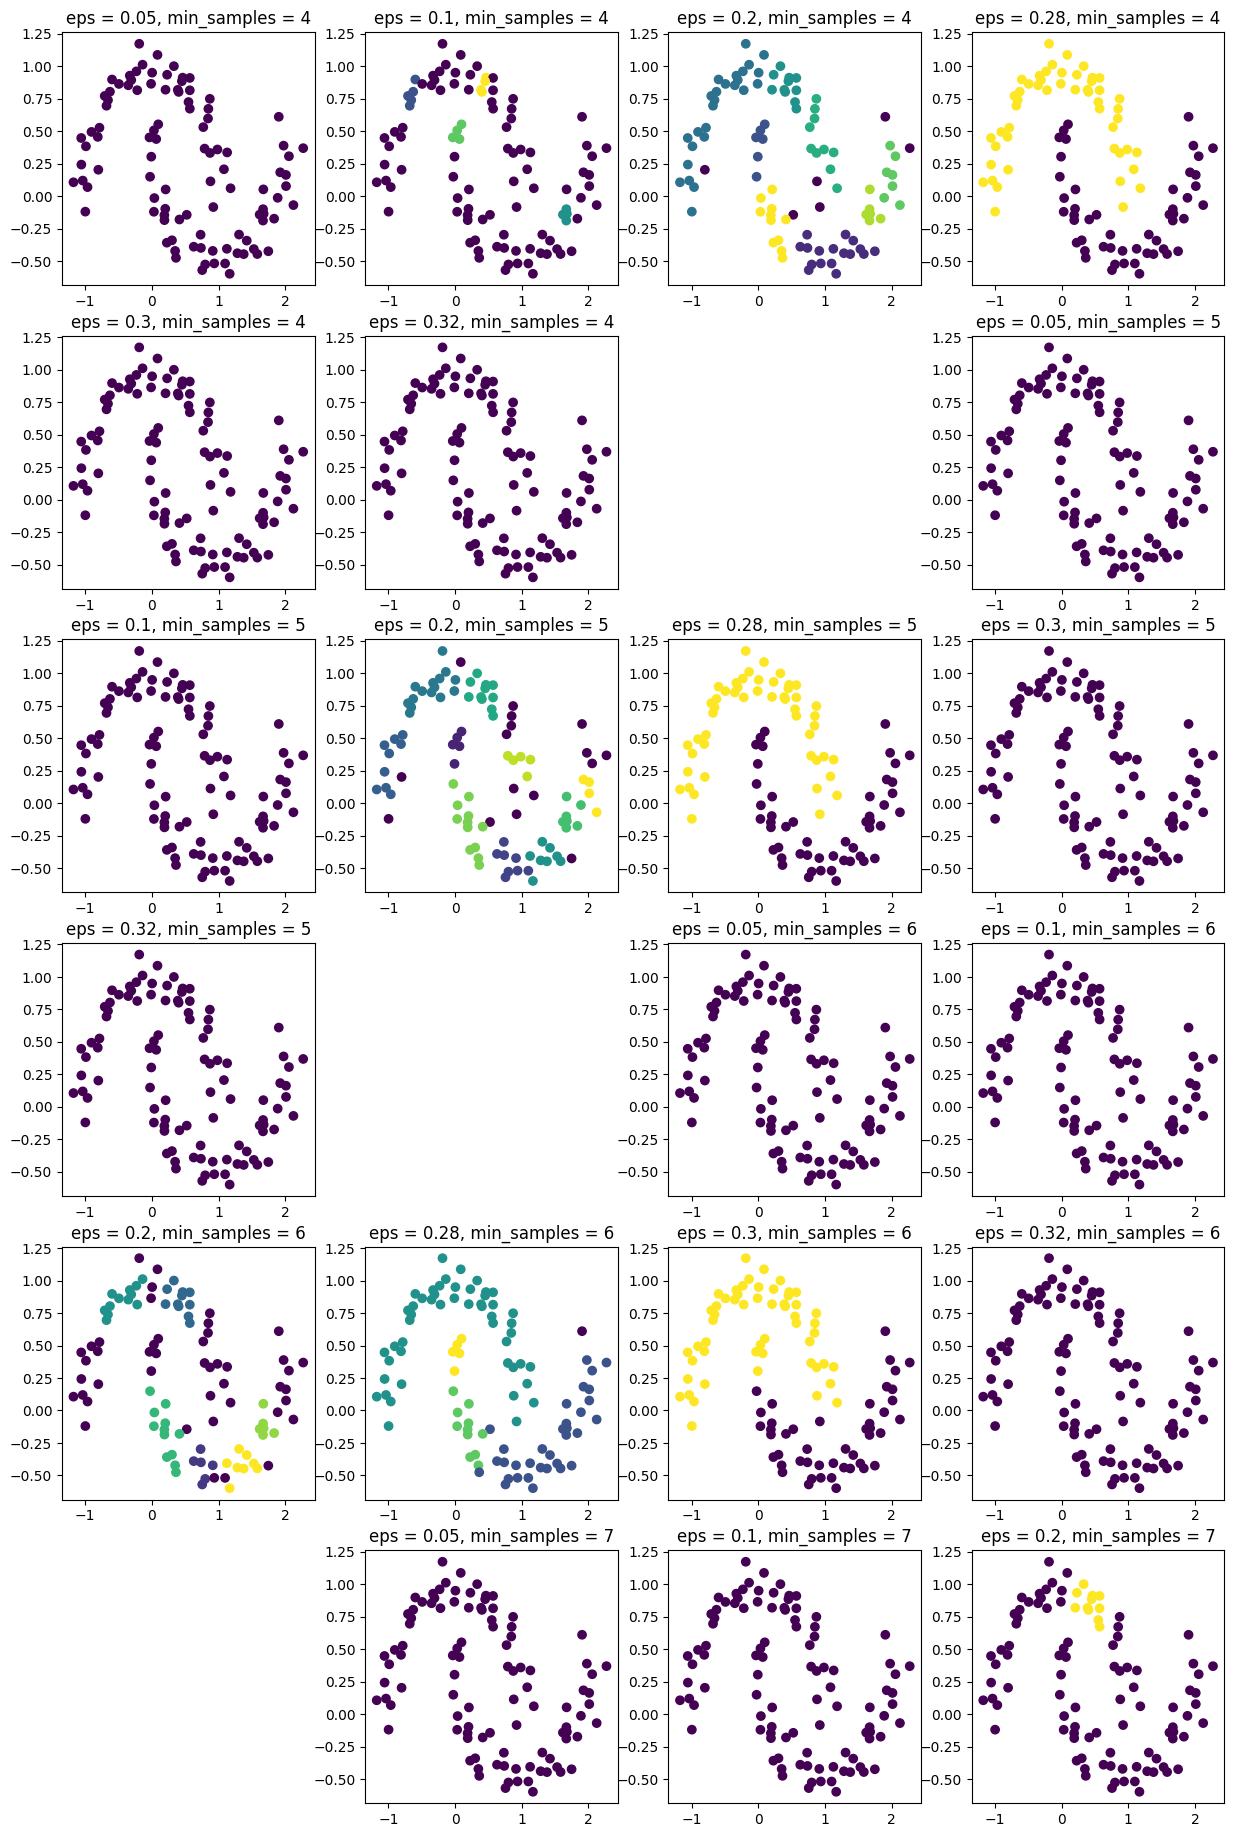

In [124]:
from sklearn.cluster import DBSCAN

plt.figure(figsize= (15,23))
i = 1
for samples in [4, 5, 6, 7]:
    for e in [0.05, 0.1, 0.2, 0.28, 0.3, 0.32]:
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X)
        plt.subplot(6, 4, i)
        plt.scatter(X[:,0], X[:,1], c = clusters)
        plt.title('eps = {}, min_samples = {}'.format(e, samples))
        i += 1
    i+=1

plt.show()

## Quiz

Используйте иерархическую кластеризацию для поиска кластеров.
Задайте в методе 2 кластера. Подберите гиперпараметр linkage из списка ['ward', 'complete', 'average', 'single'], дающий наилучший результат.

In [125]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

In [128]:
from sklearn.cluster import AgglomerativeClustering

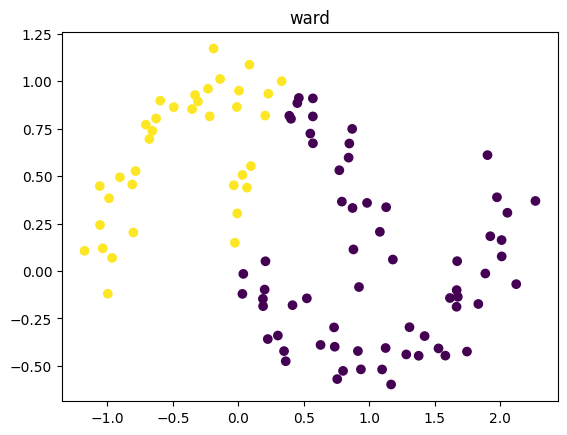

In [142]:
model = AgglomerativeClustering(n_clusters=2, linkage='ward').fit_predict(X)
plt.scatter(X[:,0], X[:,1], c = model)
plt.title('ward');

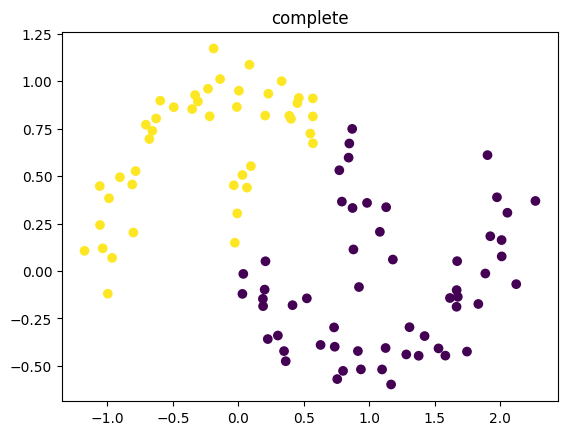

In [141]:
model = AgglomerativeClustering(n_clusters=2, linkage='complete').fit_predict(X)
plt.scatter(X[:,0], X[:,1], c = model)
plt.title('complete');

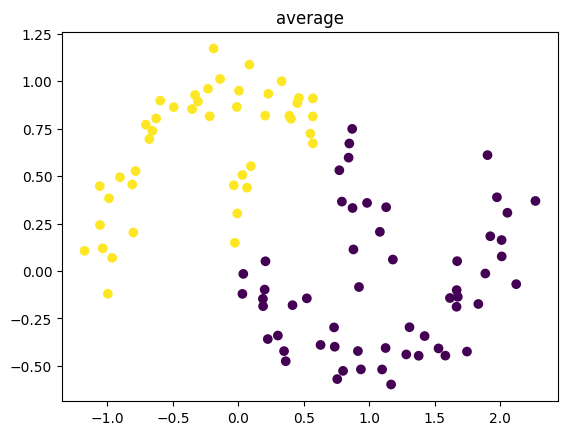

In [143]:
model = AgglomerativeClustering(n_clusters=2, linkage='average').fit_predict(X)
plt.scatter(X[:,0], X[:,1], c = model)
plt.title('average');

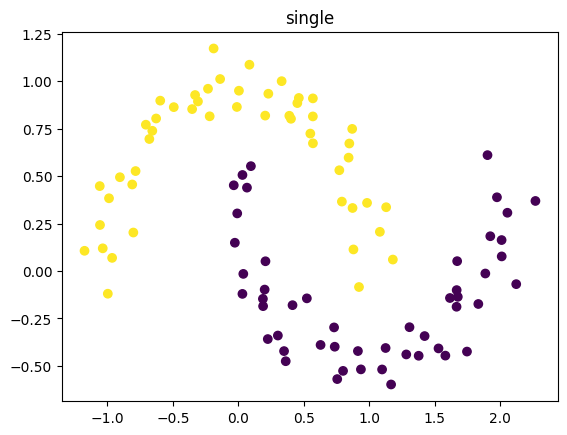

In [144]:
model = AgglomerativeClustering(n_clusters=2, linkage='single').fit_predict(X)
plt.scatter(X[:,0], X[:,1], c = model)
plt.title('single');

## Quiz

Попробуйте найти кластеры при помощи спектральной кластеризации.
Задайте 2 кластера, affinity='nearest_neighbors'. Подберите гиперпараметр n_neighbors из диапазона [1,2,...,19], чтобы добиться наилучшего результата.

In [145]:
from sklearn.cluster import SpectralClustering

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


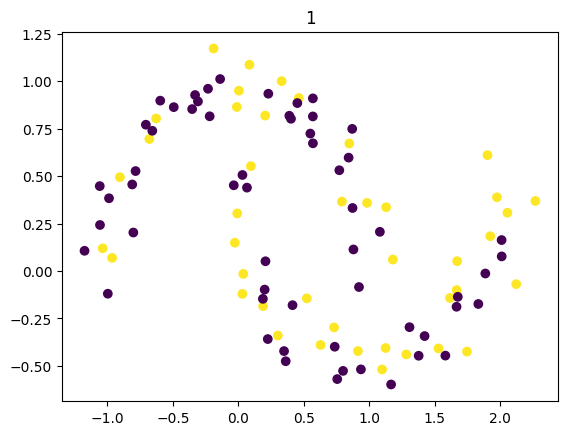

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


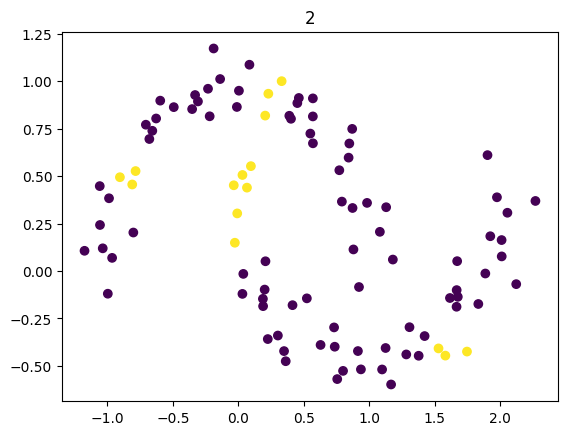

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


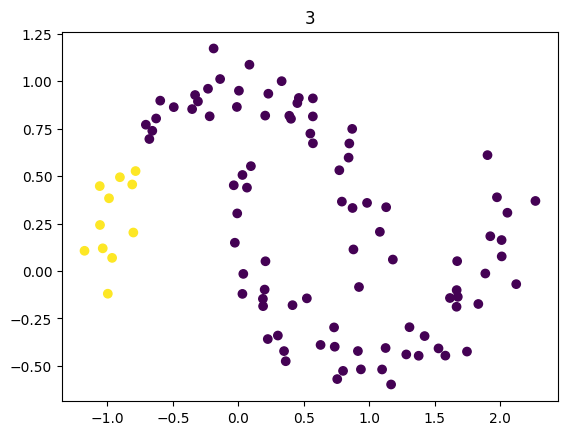

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


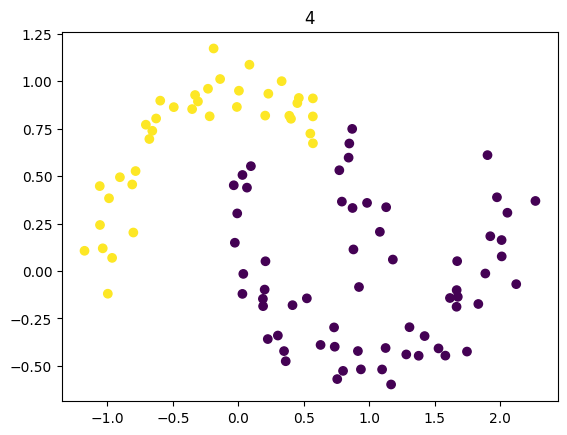

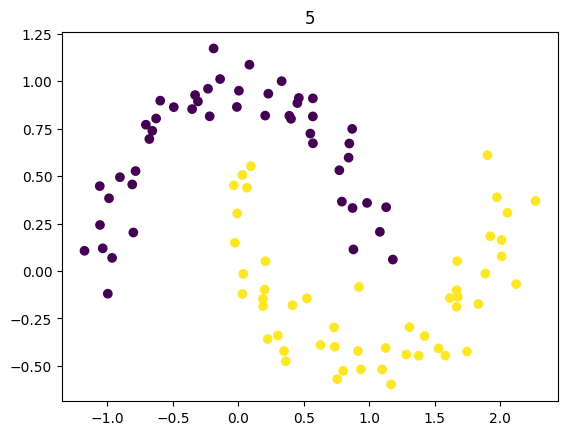

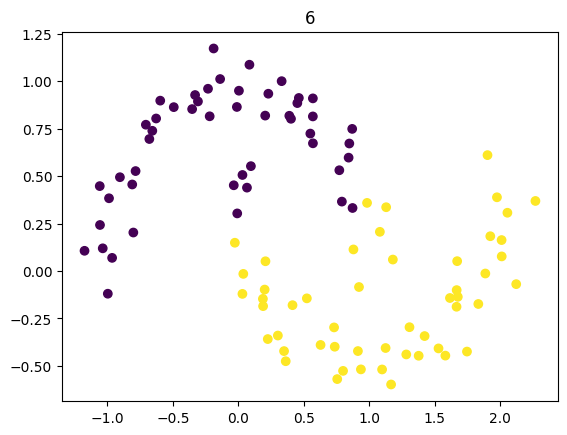

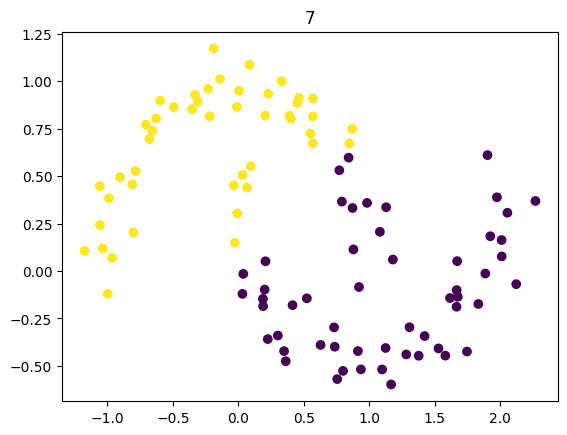

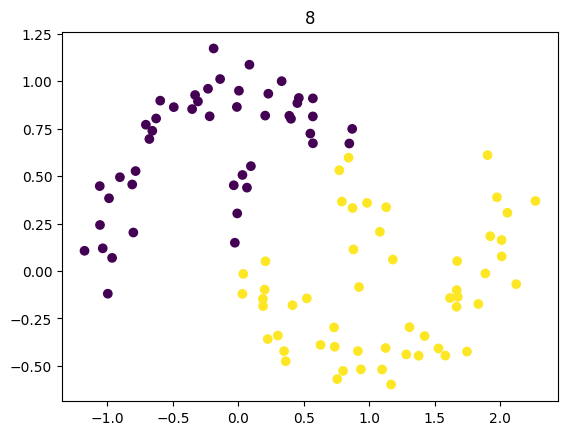

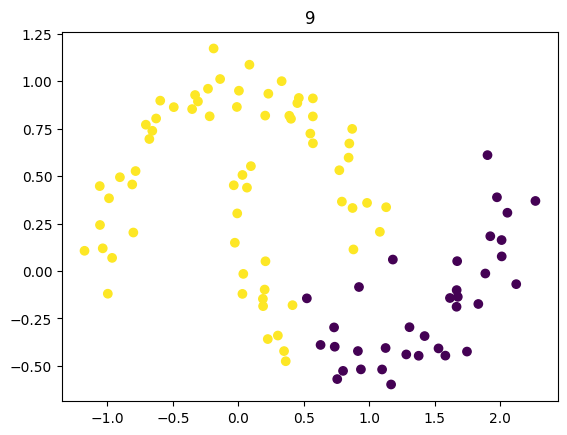

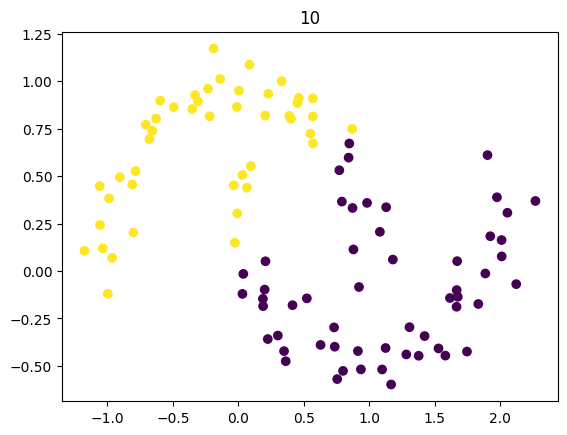

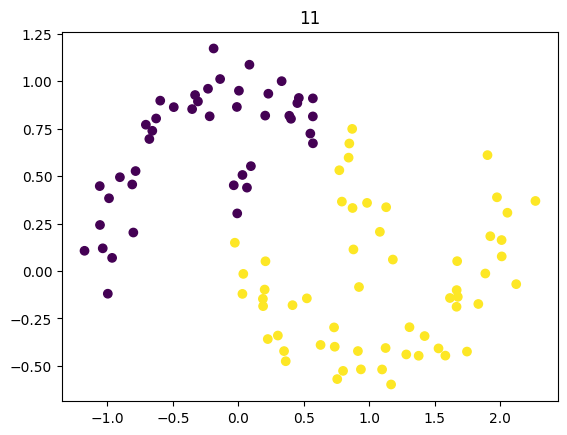

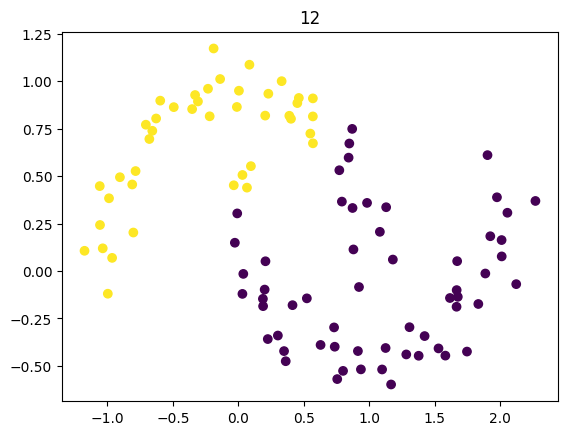

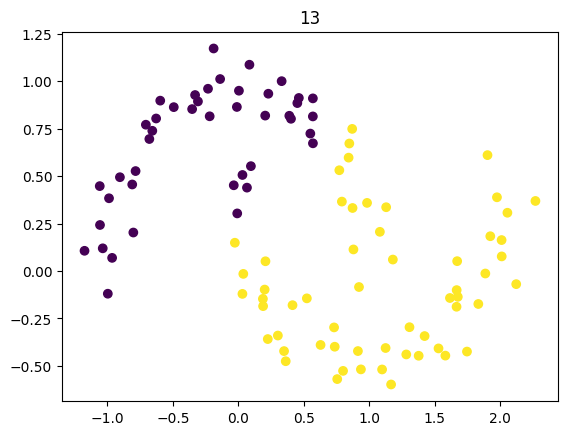

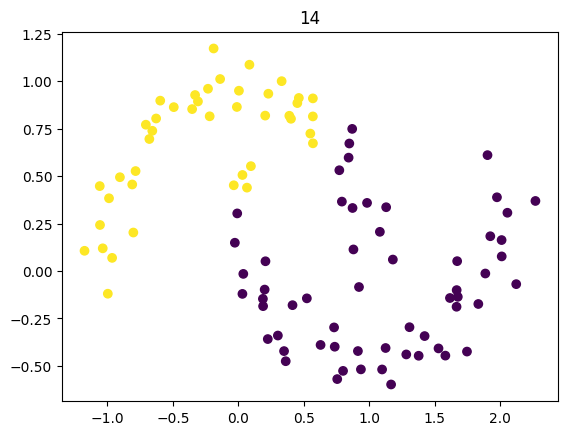

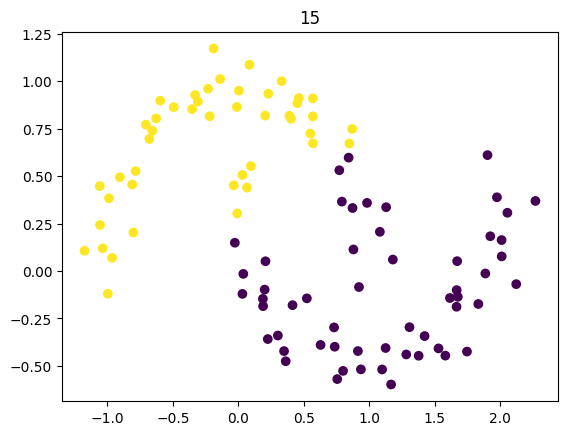

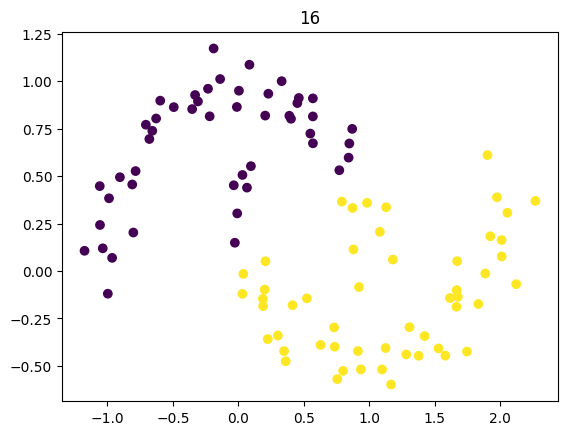

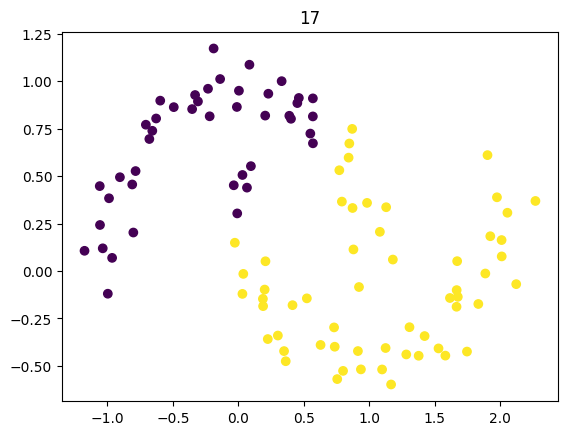

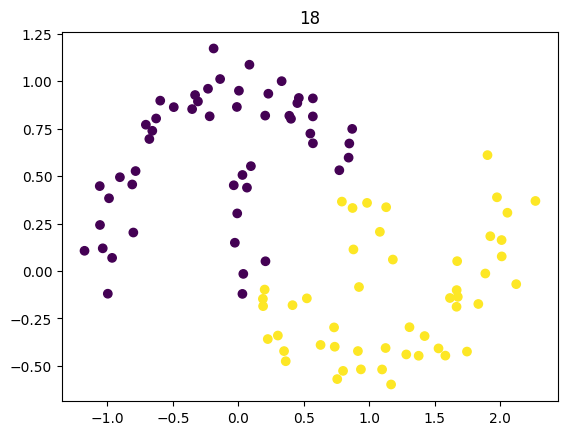

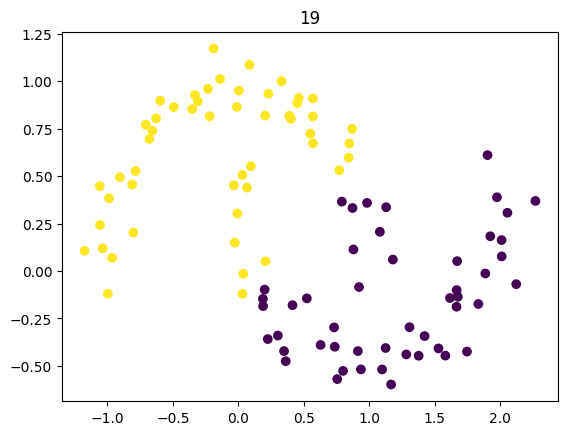

In [150]:
for n in range(19):
  model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=n+1).fit_predict(X)
  plt.scatter(X[:,0], X[:,1], c = model)
  plt.title(n+1)
  plt.show();


## Quiz

Сделайте выводы: какой метод сработал лучше других? какой метод сработал быстрее? есть ли метод, наилучший и по качеству, и по времени одновременно?

Все, кроме KMeans нашли решение.
Мне больше всего понравилась работа DBScan, но это субъективно
Время работы алгоритмов на данном датасете примерно одинаковое.